<a href="https://colab.research.google.com/github/SavantLogics/SavantLogics/blob/main/Univariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import io
import seaborn as sns
from scipy import stats
from google.colab import files
from numpy import random
from sklearn.linear_model import LinearRegression

%matplotlib inline

In this section, you will use the data for ONE variable only. Pick the variable that is more interesting to analyze. For example: if your independent variable is sequential data such as year with 30 years and one piece of data per year, your x-values might be 1971, 1972, 1973, 1974, …, 2000. This would not be interesting to analyze. In that case, choose to use the dependent variable to analyze for this part of the project.

In [2]:
video_games = files.upload() 

Saving Video_Games_Sales_as_at_22_Dec_2016.csv to Video_Games_Sales_as_at_22_Dec_2016.csv


In [3]:
vg = pd.read_csv(io.BytesIO(video_games['Video_Games_Sales_as_at_22_Dec_2016.csv']))
vg.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76,51,8,322
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,0,0,0,0
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82,73,8.3,709
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80,73,8,192
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,0,0,0,0


In [4]:
vg.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score         int64
Critic_Count         int64
User_Score          object
User_Count           int64
dtype: object

In [5]:
# Get the top 50 games

fifty_games = vg[: 50]
sales = fifty_games['Critic_Score'].fillna(0)

Summarize your data in a chart with columns showing data value, frequency, relative frequency, and cumulative relative frequency.

In [14]:
# Summarize the data 

sales = fifty_games[['Critic_Score']]
sales.describe()

,Critic_Score
count,50.000000
mean,55.320000
std,42.609015
min,0.000000
25%,0.000000
50%,80.000000
75%,89.000000
max,97.000000


In [27]:
# Frequency  of each score

frequency_sales = pd.crosstab(index=sales['Critic_Score'], columns='Frequency Count')
frequency_sales

col_0,Frequency Count
Critic_Score,
0,18
58,1
61,1
76,1
77,2
80,3
82,1
83,2
85,1


In [29]:
# Relative Frequency 

relative_freq = sales['Critic_Score'].value_counts(normalize=True)
relative_freq

0     0.36
97    0.10
88    0.06
80    0.06
95    0.06
89    0.04
87    0.04
94    0.04
83    0.04
77    0.04
85    0.02
93    0.02
76    0.02
61    0.02
91    0.02
58    0.02
82    0.02
86    0.02
Name: Critic_Score, dtype: float64

In [34]:
# Cumulative Relative Frequency

cumulative_freq = relative_freq.cumsum()
cumulative_freq

0     0.36
97    0.46
88    0.52
80    0.58
95    0.64
89    0.68
87    0.72
94    0.76
83    0.80
77    0.84
85    0.86
93    0.88
76    0.90
61    0.92
91    0.94
58    0.96
82    0.98
86    1.00
Name: Critic_Score, dtype: float64

In [15]:
# Sample mean 

sales.mean()

Critic_Score    55.32
dtype: float64

In [16]:
# Sample standard deviation 
sales.std()

Critic_Score    42.609015
dtype: float64

In [19]:
# First quartile 
sales.quantile(q=0.25)

Critic_Score    0.0
Name: 0.25, dtype: float64

In [20]:
# Third quartile 
sales.quantile(q=0.75)

Critic_Score    89.0
Name: 0.75, dtype: float64

In [21]:
# Median
sales.median()

Critic_Score    80.0
dtype: float64

In [22]:
# 70th percentile
sales.quantile(q=0.70)

Critic_Score    88.0
Name: 0.7, dtype: float64

Answer the following question, rounded to two decimal places:

In [23]:
# Value that is 2 standard deviations above the mean

sales.std() * 2

Critic_Score    85.21803
dtype: float64

In [24]:
# Value that is 1.5 standard deviations below the mean
sales.std() * -1.5

Critic_Score   -63.913523
dtype: float64

In [8]:
fifty_games.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,2004.760000,9.822200,5.664000,2.812600,1.885200,20.183600,55.320000,40.280000,970.800000
std,7.872867,7.129288,4.350601,2.366058,1.989727,11.518502,42.609015,33.608211,1693.962075
min,1984.000000,2.500000,0.010000,0.060000,0.230000,11.350000,0.000000,0.000000,0.000000
25%,2002.000000,5.915000,3.460000,0.472500,0.772500,13.357500,0.000000,0.000000,0.000000
50%,2006.500000,8.330000,4.485000,2.810000,1.290000,16.000000,80.000000,50.500000,217.000000
75%,2010.000000,10.550000,6.782500,4.175000,2.122500,23.000000,89.000000,71.250000,1051.000000
max,2015.000000,41.360000,28.960000,10.220000,10.570000,82.530000,97.000000,100.000000,8713.000000


Construct a histogram displaying your data. Group your data into six to ten intervals of equal width. Pick regularly spaced intervals that make sense in relation to your data. 

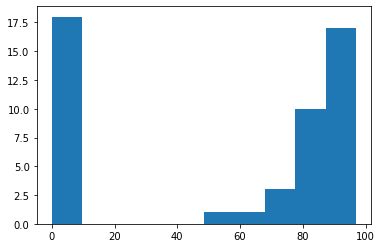

In [58]:
sales['Critic_Score'].hist(bins=10, grid=False)

In complete sentences, describe the shape of your histogram.

The histogram is left skewed because there were over 17 out of 50 games that got a zero the critic score.  

Are there any potential outliers? Which values are they? Show your work and calculations as to how you used the potential outlier formula in CH3: Descriptive Statistics (since you are now using univariate data) to determine which values might be outliers.

Construct a box plot of your data.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


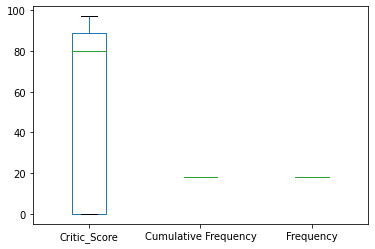

In [61]:
sales.boxplot(grid=False)

Does the middle 50% of your data appear to be concentrated together or spread out? Explain how you determined this.

The majority of the data is spread out due to the fact that there were a lot of zeros in the critic scores . 

Looking at both the histogram AND the box plot, discuss the distribution of your data. For example: how does the spread of the middle 50% of your data compare to the spread of the rest of the data represented in the box plot; how does this correspond to your description of the shape of the histogram; how does the graphical display show any outliers you may have found; does the histogram show any gaps in the data that are not visible in the box plot; are there any interesting features of your data that you should point out.